In [3]:
import sys
sys.path.append("../")

In [4]:
INTERVAL_LOW = 0
INTERVAL_HIGH = 100

In [1]:
import random
a = 0.2
b = 0.1
normalization_factor = 55
def system(y, t,a,b, N):
    S, I, R = y
    dSdt = -a * S * I / N
    dIdt = a * S * I / N - b * I
    dRdt = b * I
    return dSdt, dIdt, dRdt



def get_time_norm_function(function, max_time):
    def function_norm_time(t):
        return function(t * max_time)

    return function_norm_time

include_time = False

class ExactModel:
    def eval_model(self, X, normalization_factor = 50):
        
        if include_time:
            return [-0.2 * (X[1] * normalization_factor) * X[2] * normalization_factor / N]
        else:
            return [-0.2 * (X[0] * normalization_factor) * X[1] * normalization_factor / N]

#         if include_time:
#             return [a * X[1] * normalization_factor * X[2]* normalization_factor / N - b * X[3]*normalization_factor]
#         else:
#             return [a * X[0] * normalization_factor * X[1]* normalization_factor / N - b * X[2]*normalization_factor]

#         if include_time:
#             return [b* X[2]*normalization_factor]
#         else:
#             return [b* X[1]*normalization_factor]


def initial_conditions_sir(population_size, number_of_initial_conditions):
    def generate_initial_conditions(sum_of_numbers = 1000):
        l = [random.randint(0, sum_of_numbers) for i in range(2)]
        l+= [0, sum_of_numbers]
        l.sort()
        sir = []
        for i in range(1, len(l)):
            sir.append(l[i] - l[i-1])
        return sir
#     def generate_initial_conditions(sum_of_numbers = 1000):
#         return [random.randint(0,sum_of_numbers) for _ in range(3)]
    yield [population_size-1,1,0]
    for i in range(number_of_initial_conditions -1):  
        yield generate_initial_conditions(population_size)

        
exact = ExactModel()

Generating training data...
[44, 1, 0]
[4, 10, 31]
[29, 16, 0]
[38, 3, 4]
[10, 35, 0]
[11, 34, 0]
[27, 14, 4]
[3, 38, 4]
[0, 1, 44]
[21, 0, 24]
Generating training data...
[45, 1, 0]
[16, 8, 22]
[3, 25, 18]
[28, 18, 0]
[4, 16, 26]
[10, 25, 11]
[4, 42, 0]
[3, 37, 6]
[18, 26, 2]
[21, 21, 4]
Generating training data...
[46, 1, 0]
[12, 7, 28]
[21, 14, 12]
[18, 8, 21]
[20, 25, 2]
[27, 3, 17]
[22, 15, 10]
[1, 24, 22]
[3, 14, 30]
[30, 3, 14]
Generating training data...
[47, 1, 0]
[4, 41, 3]
[13, 16, 19]
[12, 19, 17]
[11, 10, 27]
[21, 4, 23]
[7, 34, 7]
[14, 12, 22]
[17, 6, 25]
[23, 20, 5]
Generating training data...
[48, 1, 0]
[13, 30, 6]
[10, 28, 11]
[0, 24, 25]
[4, 41, 4]
[9, 6, 34]
[17, 12, 20]
[17, 28, 4]
[3, 18, 28]
[31, 7, 11]
Generating training data...
[49, 1, 0]
[28, 6, 16]
[2, 33, 15]
[8, 22, 20]
[22, 24, 4]
[5, 19, 26]
[29, 12, 9]
[9, 6, 35]
[14, 4, 32]
[46, 2, 2]
Generating training data...
[50, 1, 0]
[26, 21, 4]
[3, 46, 2]
[10, 26, 15]
[19, 1, 31]
[28, 13, 10]
[11, 15, 25]
[1, 12,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[11, 23, 20]
Done


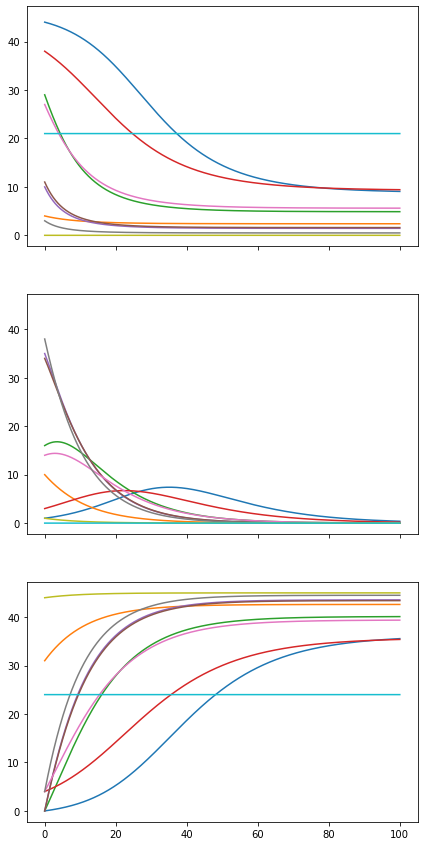

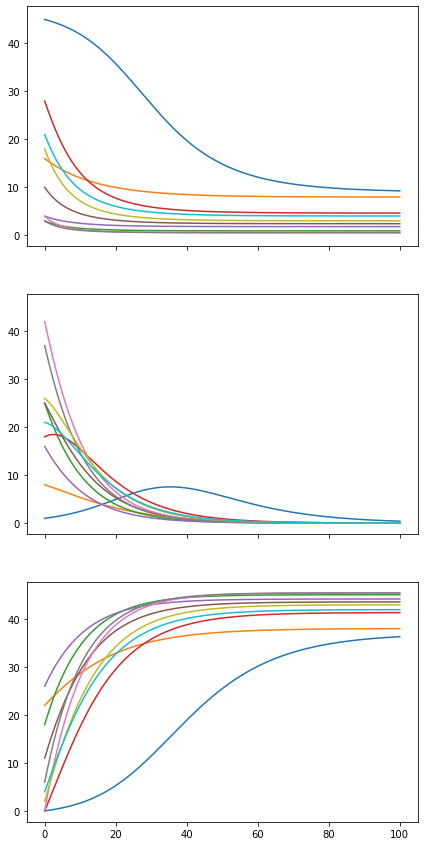

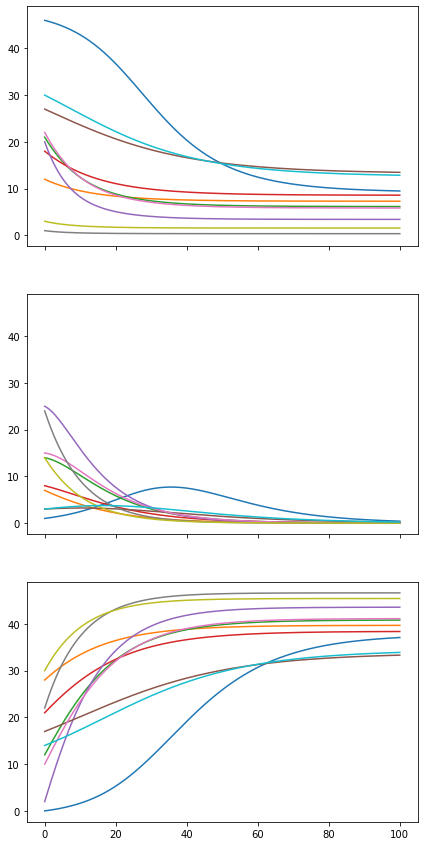

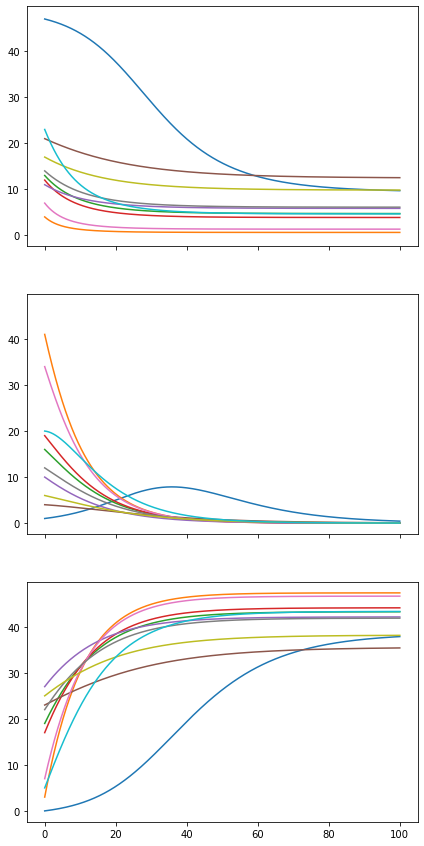

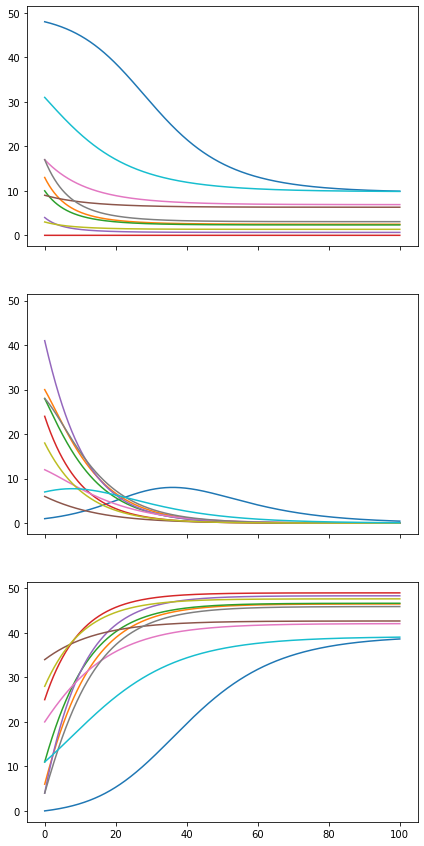

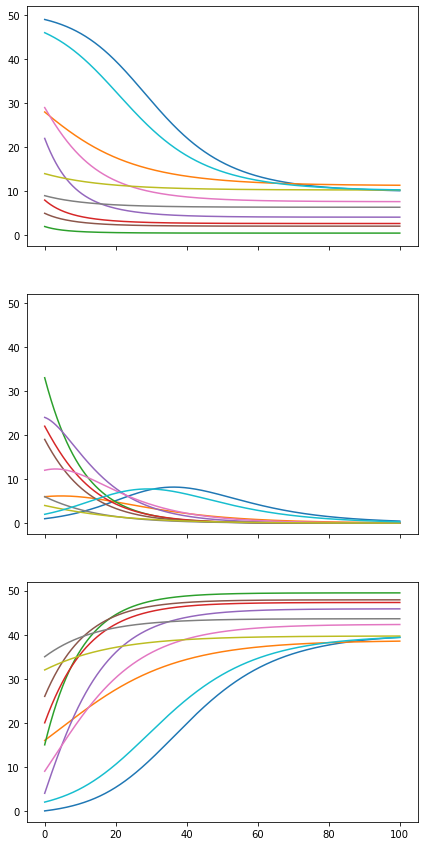

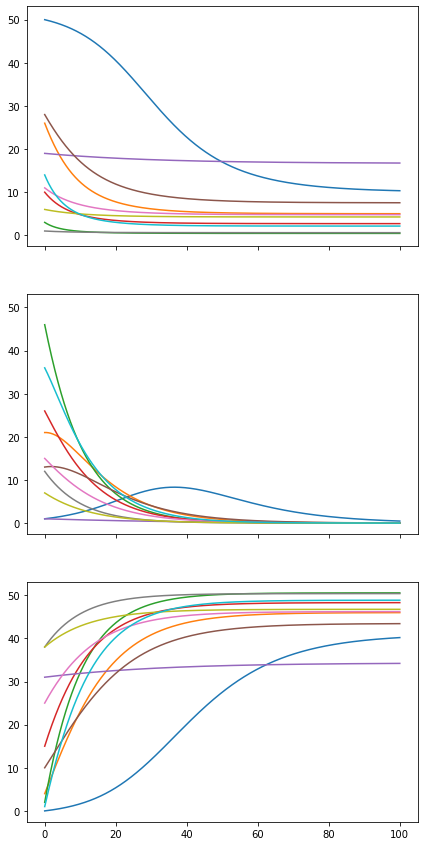

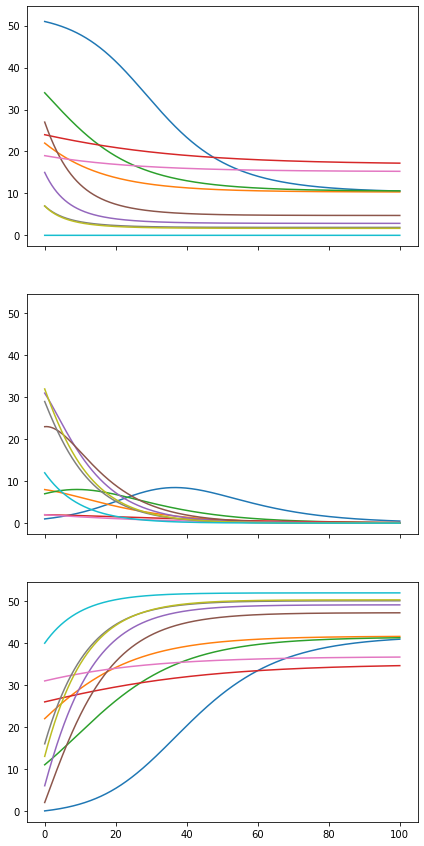

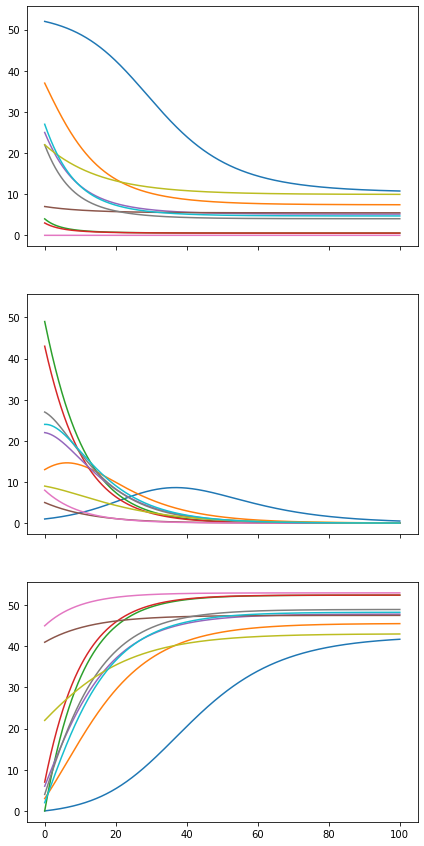

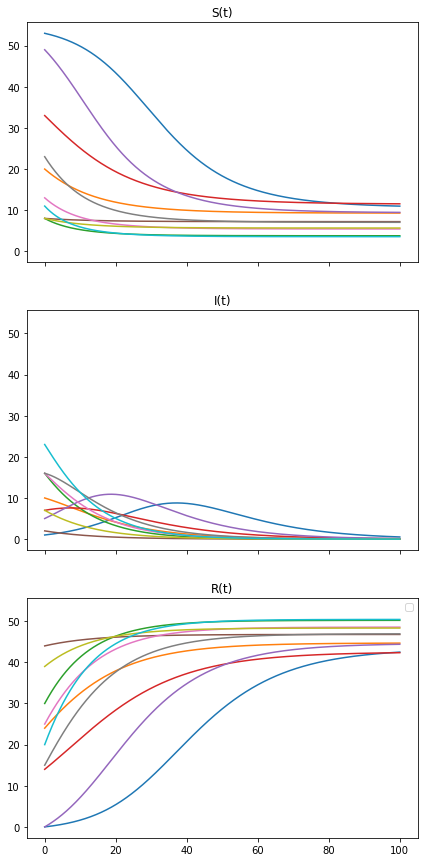

In [6]:
from interpolation.interpolate_system import odeint_interpolate
from interpolation.regression_dataset import RegressionDataset

import matplotlib.pyplot as plt
import numpy as np

# number_of_systems = 100

number_of_systems = 10
samples_per_system = 10000

dataset_train = None
dataset_test = None

# population_size = N

for population_size in range(45,55):
    N = population_size
    print("Generating training data...")
    f, axes = plt.subplots(3, 1, sharex='col', sharey='col', figsize=(7, 15))
    for init_conditions in initial_conditions_sir(population_size, number_of_systems):
        assert sum(init_conditions) == N, f"sum is {sum(init_conditions)}, must be {N}"
        y_inter = odeint_interpolate( system, init_conditions, INTERVAL_LOW, INTERVAL_HIGH, 10000, (a,b, N))
        y_inter_time_norm = [get_time_norm_function(yi, INTERVAL_HIGH) for yi in y_inter]
        t = np.linspace(INTERVAL_LOW, INTERVAL_HIGH, 10000)
        S,I,R = y_inter
        axes[0].plot(t, [S(ti) for ti in t])
        axes[1].plot(t, [I(ti) for ti in t])
        axes[2].plot(t, [R(ti) for ti in t])

    #     y_inter_time_norm = y_inter_time_norm[:2]
        print(init_conditions)
        def y_prime(t):
            return -a * y_inter_time_norm[0](t) * y_inter_time_norm[1](t) / N
#             return a * y_inter_time_norm[0](t) * y_inter_time_norm[1](t) /N - b * y_inter_time_norm[1](t)
#             return b * y_inter_time_norm[1](t)

        d_train = RegressionDataset(y_inter_time_norm, y_prime, normalization_factor, samples_per_system * 80 // 100, include_time,0,0.2)
        d_test = RegressionDataset(y_inter_time_norm, y_prime, normalization_factor, samples_per_system * 20 // 100, include_time,0,0.2)

        if dataset_train:
            dataset_train.concat_dataset(d_train)
            dataset_test.concat_dataset(d_test)
        else:
            dataset_train = d_train
            dataset_test = d_test

print("Done")
axes[0].set_title("S(t)")
axes[1].set_title("I(t)")
axes[2].set_title("R(t)")
  
plt.legend()
plt.show()
    

In [8]:
%load_ext autoreload
%autoreload 2
from interpolation.regression_nn import RegressionNN
m1 = RegressionNN.nn_dataset_regression(dataset_train, dataset_test)

NVIDIA GeForce RTX 3050 Ti Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
epoch: 0
train_loss: 0.4753600625929664
test_loss: 0.37894142267047287
epoch: 10
train_loss: 0.002186536408700807
test_loss: 0.00247293680759142
epoch: 20
train_loss: 0.0015589174520088253
test_loss: 0.0012984483940143557
epoch: 30
train_loss: 0.0015565729887518837
test_loss: 0.0020046546970025453
epoch: 40
train_loss: 0.0015806480911284893
test_loss: 0.0011644145836733739
epoch: 50
train_loss: 0.001185704147837132
test_loss: 0.0013954027010933327
epoch: 60
train_loss: 0.0015330179840928597
test_loss: 0.0012820950712931314
epoch: 70
train_loss: 0.0016214555067043015
test_loss: 0.0009549368771629371
epoch: 80
train_loss: 0.0012598267996873035
test_loss: 0.0014140207304469716
epoch: 90
train_loss: 0.0012734476529507417
test_loss: 0.0014741242650111223
train_loss: 0.0009934856922680358
test_loss: 0.0011279880777541166


In [ ]:
m1.plot_learn_history(30,100)

In [22]:
%load_ext autoreload
%autoreload 2
from query_set.check_var_exist import check_var_exist_grad_dataset

values = check_var_exist_grad_dataset(m1, 0, dataset_train)
avr = sum(values)/len(values)
print(avr)


values = check_var_exist_grad_dataset(m1, 1, dataset_train)
avr = sum(values)/len(values)
print(avr)


values = check_var_exist_grad_dataset(m1, 2, dataset_train)
avr = sum(values)/len(values)
print(avr)

values = check_var_exist_grad_dataset(m1, 3, dataset_train)
avr = sum(values)/len(values)
print(avr)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.0523598432758414
1.8652400367352409
3.9234764949684746
0.3283747317183126


In [12]:
%load_ext autoreload
%autoreload 2
from query_set.regression_dependency import check_polynomial_dependency

result = check_polynomial_dependency(
        m1,
        1,
        y_inter_time_norm,
        0,
        1,
        3,
        normalization_factor,
        5,
        1000,
        include_time)

print(result)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'polynomial': [0.00020159163216517515, -0.0038654581725867687, -0.06515691169978723, -0.03903101503783693], 'determination': 0.9999885739634631}
